# Environment Setting

In [1]:
import sys
sys.path.append('../scripts')

from HYDRO_stats import TrendDetector

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Example data input

In [6]:
ds = xr.open_dataset('../data/lai_jjj_annual.nc')


ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html

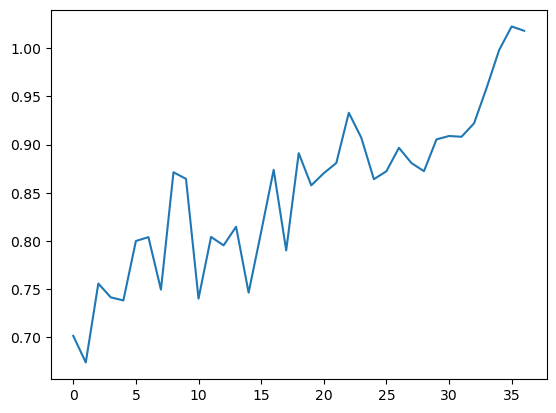

In [3]:
arr1D = np.nanmean(ds['lai'].values, axis=(1,2))
plt.plot(arr1D)

# Trend Detection for 1 Dimension Data

In [4]:
td = TrendDetector()
resultDict = td.trendLinear1D(arr1D)

In [5]:
resultDict

{'changeValue': 0.25856031470869967,
 'mean': 0.8497943908326983,
 'changeRatio': 30.426220447906356,
 'pValue': 1.9846611149053372e-13,
 'slope': 0.0069881166137486395,
 'intercept': 0.7240082917852227}

# Trend Detection for 3 Dimension Data

In [6]:
arr3D = ds['lai'].values

td3D = TrendDetector()
resultDict = td3D.trendLinear3D(arr3D)

  0%|          | 0/76 [00:00<?, ?it/s]

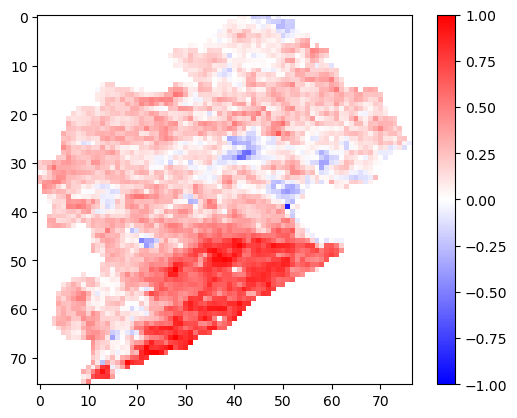

In [7]:
plt.imshow(resultDict['changeValue'], cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()